<a href="https://colab.research.google.com/github/Srinidhireddythati/SentimentAnalysis/blob/main/AirLine_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ABOUT DATASET
"""
-->Dataset available on Kaggle.
-->Contains tweets about various US airlines.
-->Tweets are from February 2015.
-->Each tweet is labeled with sentiment: positive, negative, or neutral.
-->Used for sentiment analysis tasks.
-->Helps understand if customers are happy or unhappy with the airlines.
-->Supports making smart decisions.
-->Helps airlines make your flying experience better.
-->Contains a lot of tweets for analysis.
-->Useful for learning about trends in customer sentiment(better or worse).
-->Helps find areas where airlines need to improve.






-->Can help make better marketing and customer service strategies.
-->Useful for understanding what the public thinks about airlines.
"""

'\n-->Dataset available on Kaggle.\n-->Contains tweets about various US airlines.\n-->Tweets are from February 2015.\n-->Each tweet is labeled with sentiment: positive, negative, or neutral.\n-->Used for sentiment analysis tasks.\n-->Helps understand if customers are happy or unhappy with the airlines.\n-->Supports making smart decisions.\n-->Helps airlines make your flying experience better.\n-->Contains a lot of tweets for analysis.\n-->Useful for learning about trends in customer sentiment(better or worse).\n-->Helps find areas where airlines need to improve.\n-->Can help make better marketing and customer service strategies.\n-->Useful for understanding what the public thinks about airlines.\n'

In [ ]:
#Importing Libraries
import os
import re
import time
import h5py #h5py allows users to create, read, write, and manipulate HDF5 files using a Pythonic interface
import numpy as np
import pandas as pd
import seaborn as sns #creating visually appealing statistical graphics
import matplotlib.pyplot as plt
from scipy import stats #wide range of statistical functions and distributions for probability distributions, statistical tests
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
#Classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_curve,
    auc,
    log_loss,
    f1_score
)
import torch
import torch.nn as nn #Contains neural network layers and modules.
import torch.optim as optim #Provides optimization algorithms
import torch.nn.functional as F  #Contains functional operations for building neural networks.
from torch.utils.data import DataLoader, TensorDataset #Provides tools for data loading and manipulation.
from torchsummary import summary #Allows for summarizing PyTorch model architectures.

# Download NLTK data
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Open a DataFrame and load the dataset.
data = pd.read_csv('/content/Tweets.csv')
# Show the DataFrames first 5 rows.
print(data.head())
# Show the DataFrame's summary statistics.
print(data.describe())
# Output the DataFrame's row count.
print(len(data))

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [ ]:
#Taking out numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Print details regarding the numerical columns.
print("No. of numerical columns:", len(numerical_columns), "\nNumerical columns are:", numerical_columns)

# Categorical columns
category_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
# Print details regarding columns that are categorical.
print("No. of categorical columns:", len(category_columns), "\nCategorical columns are:", category_columns)




No. of numerical columns: 4 
Numerical columns are: ['tweet_id', 'airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count']
No. of categorical columns: 11 
Categorical columns are: ['airline_sentiment', 'negativereason', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']


In [ ]:

# Display the DataFrame
display(data)

# Verify that the DataFrame contains no null values.
void_val = data.isnull().sum()

# Print the DataFrame's total number of rows.
# Print the number of Null values in each DataFrame column
print("Number of rows:", len(data))
print(void_val)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


Number of rows: 14640
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [ ]:
# Handling null values
# Dropping columns with excessive null values
columns_to_be_removed = ['tweet_id', 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord']
new_data = data.drop(columns=columns_to_be_removed, axis=1)

# Filling null values with the mode
replaced_mode_columns = ['tweet_location', 'user_timezone']

for column in replaced_mode_columns:
    # Determining the most frequent value (mode) for the column
    mode_value = new_data[column].mode()[0]
    # Imputing null values with the mode value
    new_data[column].fillna(value=mode_value, inplace=True)

# Replacing any remaining null values with "Unknown"
display(new_data)


,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,"Boston, MA",Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,"Boston, MA",Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,"Boston, MA",Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,"Boston, MA",Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,"Boston, MA",Eastern Time (US & Canada)
14636,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,Texas,Eastern Time (US & Canada)
14637,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,"Nigeria,lagos",Eastern Time (US & Canada)
14638,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
new_data.to_csv("tweets_updated.csv", index=False)

In [ ]:
# Tokenizing texts and counting word occurrences within the dataset
textfile = new_data["text"]
count_of_words = Counter(word for text in textfile for word in word_tokenize(text.lower()))

# Generating a dictionary for vocabulary with a unique index for every word. Special
# indices are designated for padding (0) and out-of-vocabulary (1) tokens.
dictionary = {word: i + 2 for i, (word, _) in enumerate(count_of_words.most_common())}
dictionary["<PAD>"] = 0
dictionary["<OOV>"] = 1




In [ ]:
# Calculating total vocabulary size
size_of_dictionary = len(dictionary)
# Setting the fixed sequence length for all inputs
n_maximum = 200
# Process for encoding texts into
#numerical sequences and padding them for uniform length
encoding_list = []




In [ ]:
t = new_data["text"]
encoding_list = []

for text in t:
    # Convert each word in a text to its corresponding index
    #from the vocabulary, using index 1 if the word is not in the vocabulary
    encoded = [dictionary.get(word, dictionary["<OOV>"]) for word in word_tokenize(text.lower())]
    # Initialize a padded array of max_len
    #length filled with zeros
    padded = np.zeros(n_maximum, dtype=int)
    # Fill the array with the encoded sequence
    #up to max_len
    padded[:len(encoded)] = encoded[:n_maximum]
    encoding_list.append(padded)

# Transforming the list of padded sequences
#into a numpy array
encoding_list = np.array(encoding_list)

# Converting text labels into numeric form
encoder_l = LabelEncoder()
val = encoder_l.fit_transform(new_data['airline_sentiment'])
val = np.array(val)

# Initializing DataLoader objects for batching of
#training, validation, and test sets
size = 64
train_load_set = DataLoader(
    TensorDataset(torch.tensor(encoding_list, dtype=torch.long), torch.tensor(val, dtype=torch.long)),
    shuffle=True,
    batch_size=size
)

value_load_set = DataLoader(
    TensorDataset(torch.tensor(encoding_list, dtype=torch.long), torch.tensor(val, dtype=torch.long)),
    shuffle=False,
    batch_size=size
)

test_load_set = DataLoader(
    TensorDataset(torch.tensor(encoding_list, dtype=torch.long), torch.tensor(val, dtype=torch.long)),
    shuffle=False,
    batch_size=size
)



In [ ]:
#LSTM model definition with specified architecture
class SimpleLSTM(nn.Module):
    def __init__(self, size_of_dictionary):
        super(SimpleLSTM, self).__init__()
        embed_size, lstm_hidden_size, fc1_size, fc2_size, output_size = 128, 256, 128, 64, 3
         # Initializing the embedding layer to transform word indices to embeddings
        self.embedding = nn.Embedding(size_of_dictionary, embed_size)
        # Configuring the LSTM layer
        self.lstm = nn.LSTM(embed_size, lstm_hidden_size, num_layers=3, dropout=0.5, batch_first=True)
        #Defining fully connected layers for output
        self.fc1 = nn.Linear(lstm_hidden_size, fc1_size)
        self.fc2 = nn.Linear(fc1_size, fc2_size)
        # Final layer outputs probability distribution across 3 classes
        self.fc3 = nn.Linear(fc2_size, output_size)

    def forward(self, text):
        # Network forward pass
        hidden = self.embedding(text)
        hidden, _ = self.lstm(hidden)
        hidden = F.relu(self.fc2(F.relu(self.fc1(hidden[:, -1, :]))))
        return self.fc3(hidden)

# Prepare the model for training and allocate it to GPU if available
size_of_dictionary = len(dictionary)
torch_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fourth_q_model_LSTM = SimpleLSTM(size_of_dictionary).to(torch_device)

# Establish the criterion for loss calculation
#and select an optimizer for the learning process
criteria_cross_entropy = nn.CrossEntropyLoss()
optim_adam_model = optim.Adam(fourth_q_model_LSTM.parameters(), lr=0.0001)


In [ ]:
def train_test(train_load_set, value_load_set, test_load_set):
    # Lists to store metrics for training, validation, and testing phases
    loss_of_train_data, acc_of_train_data = [], []
    loss_in_val, acc_of_val = [], []
    loss_of_test_data, acc_of_test_data = [], []

    # Define the total number of epochs for training the model
    num_epochs = 10

    # Iterate over each epoch for training and validation
    for epoch in range(num_epochs):
        # Activate model's training mode
        fourth_q_model_LSTM.train()
        # Initialize variables to track training loss and accuracy
        running_loss, correct_train, total_train = 0, 0, 0

        #Process each batch from the training dataset
        for img, lb in train_load_set:
            # Assign data to the correct computing device
            img, lb = img.to(torch_device), lb.to(torch_device)
            # Clear gradients from previous steps
            optim_adam_model.zero_grad()
            # Generate predictions for the current batch
            outputs = fourth_q_model_LSTM(img)
            # Calculate loss for the current batch
            loss = criteria_cross_entropy(outputs, lb)
            # Backpropagate the loss
            loss.backward()
            # Update model parameters
            optim_adam_model.step()

            # Accumulate total loss and accuracy for this epoch
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += lb.size(0)
            correct_train += (predicted == lb).sum().item()

        # Calculate and store the average loss and accuracy for training
        loss_of_train_data.append(running_loss / len(train_load_set))
        acc_of_train_data.append(100 * correct_train / total_train)

        # Prepare the model for evaluation
        fourth_q_model_LSTM.eval()
        val_loss, correct_val, total_val = 0, 0, 0

        # Evaluate the model on the validation dataset without updating gradients
        with torch.no_grad():
            # Process each batch from the validation dataset
            for img, lb in value_load_set:
                img, lb = img.to(torch_device), lb.to(torch_device)
                outputs = fourth_q_model_LSTM(img)
                loss = criteria_cross_entropy(outputs, lb)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += lb.size(0)
                correct_val += (predicted == lb).sum().item()

        # Calculate and store the average loss and accuracy for validation
        loss_in_val.append(val_loss / len(value_load_set))
        acc_of_val.append(100 * correct_val / total_val)

        # Output the metrics for the current epoch to monitor progress
        print('Epoch: ', epoch + 1, 'Train Loss: ', loss_of_train_data[-1], 'Train Accuracy: ', acc_of_train_data[-1],
              'Validation Loss: ', loss_in_val[-1], 'Validation Accuracy: ', acc_of_val[-1])

    # Preparing lists to keep track of the
    # actual vs. predicted labels from our testing
    actual_labels, labels_to_be_predicted = [], []
    # Switching the model into evaluation mode, which
    #deactivates dropout and batch normalization for consistent predictions
    fourth_q_model_LSTM.eval()
    test_loss, correct_test, total_test = 0, 0, 0

    # Turning off gradient tracking to save computational
    #resources and memory during the prediction phase
    with torch.no_grad():
        # Going through each batch of test data to assess model performance
        for img, lb in test_load_set:
            # Ensuring data is on the correct compute resource
            #(GPU or CPU) for processing
            img, lb = img.to(torch_device), lb.to(torch_device)
            # Getting the model's predictions for the batch
            outputs = fourth_q_model_LSTM(img)
            # Comparing predicted outputs to actual labels to determine loss
            loss = criteria_cross_entropy(outputs, lb)
            # Keeping a running total of loss for analysis
            test_loss += loss.item()
            # Identifying the model's predicted classes based
            #on the highest probabilities
            _, predicted = torch.max(outputs.data, 1)
            # Tallying the count of predictions and
            #how many were correct
            total_test += lb.size(0)
            correct_test += (predicted == lb).sum().item()
            # Saving these predictions and actual
            #labels for a detailed analysis post-testing
            actual_labels.extend(lb.cpu().numpy())
            labels_to_be_predicted.extend(predicted.cpu().numpy())

        #Finalizing the average loss from the test set for a snapshot of model performance
        avg_test_loss = test_loss / len(test_load_set)
        # Deriving detailed performance metrics like
        #precision, recall, F1, and overall accuracy from our predictions
        precision = precision_score(actual_labels, labels_to_be_predicted, average='macro')
        recall = recall_score(actual_labels, labels_to_be_predicted, average='macro')
        f1 = f1_score(actual_labels, labels_to_be_predicted, average='macro')
        accuracy = accuracy_score(actual_labels, labels_to_be_predicted)

        # Sharing these metrics for insight into model effectiveness
        print("Accuracy: ", accuracy * 100)
        print("Test Loss: ", avg_test_loss)
        print("Precision: ", precision * 100)
        print("Recall: ", recall * 100)
        print("F1 Score: ", f1 * 100)

        loss_of_test_data.append(avg_test_loss)
        acc_of_test_data.append(accuracy * 100)
    # Offering up the gathered data for further evaluation or reporting
    return loss_of_train_data, acc_of_train_data, loss_in_val, acc_of_val, loss_of_test_data, acc_of_test_data, actual_labels, labels_to_be_predicted


In [ ]:
# Launching the entire train-test sequence and
#capturing the outputs for analysis
train_losses, train_accuracies, val_losses, val_accuracies, test_losses, test_accuracies, actual_labels, labels_to_be_predicted = train_test(train_load_set, value_load_set, test_load_set)


Epoch:  1 Train Loss:  0.93146692405101 Train Accuracy:  62.69125683060109 Validation Loss:  0.9161153729826081 Validation Accuracy:  62.69125683060109
Epoch:  2 Train Loss:  0.9165388043790925 Train Accuracy:  62.69125683060109 Validation Loss:  0.9171634389323439 Validation Accuracy:  62.69125683060109
Epoch:  3 Train Loss:  0.9166381244576134 Train Accuracy:  62.69125683060109 Validation Loss:  0.9161496753255353 Validation Accuracy:  62.69125683060109
Epoch:  4 Train Loss:  0.9163909452971413 Train Accuracy:  62.69125683060109 Validation Loss:  0.9168873260114911 Validation Accuracy:  62.69125683060109
Epoch:  5 Train Loss:  0.9167846922791161 Train Accuracy:  62.69125683060109 Validation Loss:  0.9163705670156854 Validation Accuracy:  62.69125683060109
Epoch:  6 Train Loss:  0.9165485654855919 Train Accuracy:  62.69125683060109 Validation Loss:  0.9173196895153762 Validation Accuracy:  62.69125683060109
Epoch:  7 Train Loss:  0.9163364031429374 Train Accuracy:  62.69125683060109 V

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


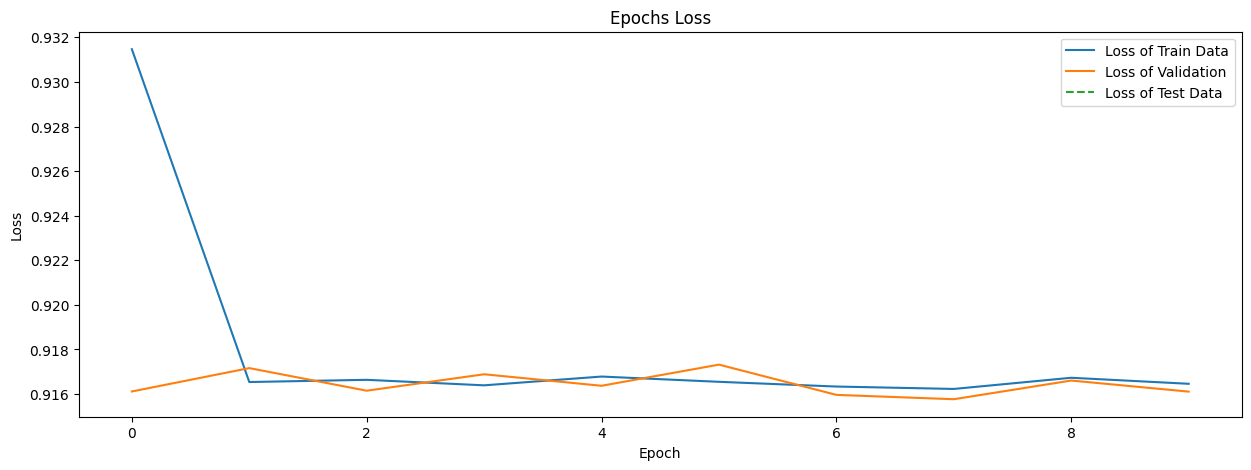

In [ ]:
# Graphing how the model's loss progressed across
#the different phases of training and testing
plt.figure(figsize=(15, 5))
plt.plot(train_losses, label='Loss of Train Data')
plt.plot(val_losses, label='Loss of Validation')
plt.plot(test_losses, label='Loss of Test Data', linestyle='dashed')
plt.title('Epochs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


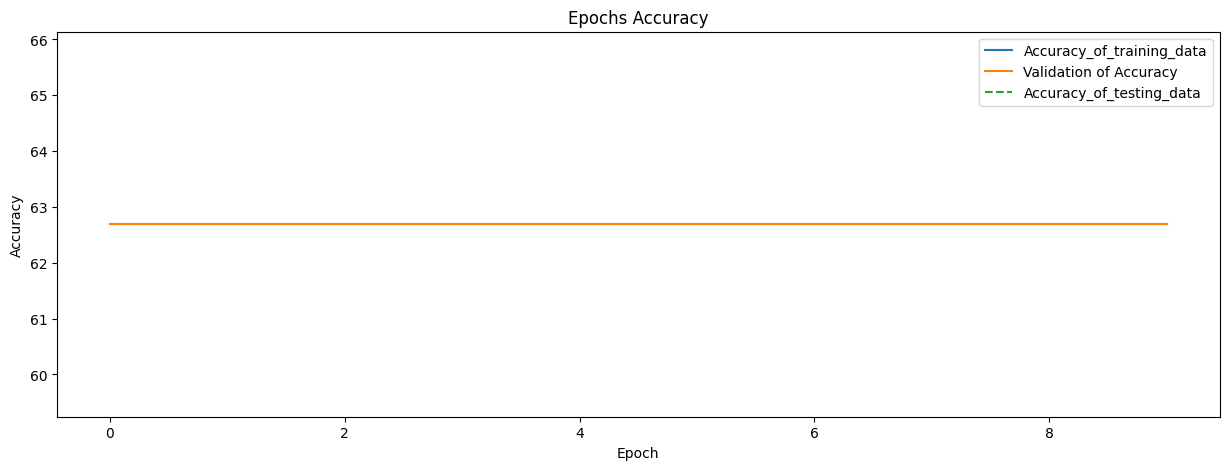

In [ ]:
# Illustrating the accuracy trends throughout
# training and testing, showcasing learning efficiency
plt.figure(figsize=(15, 5))
plt.plot(train_accuracies, label='Accuracy_of_training_data')
plt.plot(val_accuracies, label='Validation of Accuracy')
plt.plot(test_accuracies, label='Accuracy_of_testing_data', linestyle="dashed")
plt.title('Epochs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:

# Displaying a confusion matrix to highlight
#the model's prediction capabilities across different classes
confusion_matrix_custom_labels = confusion_matrix(actual_labels, labels_to_be_predicted)
confusion_matrix_custom_labels





array([[9178,    0,    0],
       [3099,    0,    0],
       [2363,    0,    0]])

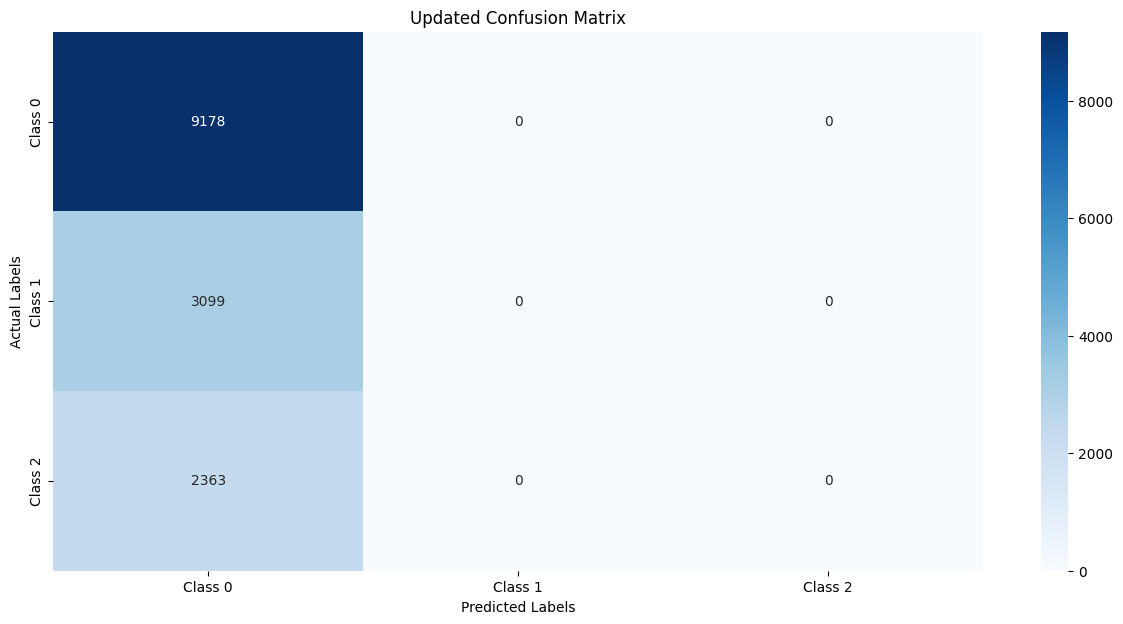

In [ ]:
# Visualize the confusion matrix with custom labels
plt.figure(figsize=(15, 7))
custom_encoder = ["Class 0","Class 1","Class 2"]
sns.heatmap(confusion_matrix_custom_labels, annot=True, fmt="d", cmap='Blues', xticklabels=custom_encoder, yticklabels=custom_encoder)
plt.title('Updated Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()



In [ ]:
# Providing a glimpse into the model's structure and learned parameters
print(fourth_q_model_LSTM)
# Ensuring the model's learned wisdom is preserved for future use
torch.save(fourth_q_model_LSTM.state_dict(), 'part3_base_model_state_dict.h5')


SimpleLSTM(
  (embedding): Embedding(17065, 128)
  (lstm): LSTM(128, 256, num_layers=3, batch_first=True, dropout=0.5)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
)


In [ ]:
# Gathering text data from the updated DataFrame
texts = new_data["text"]
# Creating a frequency distribution of all words,
#converting them to lowercase
word_counts = Counter(word for text in texts for word in word_tokenize(text.lower()))
# Assigning an index to each word based on its frequency,
# starting at 2 to reserve indices for special tokens
dictionary = {word: i + 2 for i, (word, _) in enumerate(word_counts.most_common())}
# Including special tokens for padding (<PAD>)
#and words not in the vocabulary (<OOV>)
dictionary["<PAD>"] = 0
dictionary["<OOV>"] = 1

# Calculating the total number of unique words plus special tokens
size_of_dictionary = len(dictionary)

# Setting a fixed sequence length for all inputs
n_maximum = 200
encoding_list = []
# Transforming each sentence into a sequence of indices,
# substituting with <OOV> index for any unknown word
t = new_data["text"]

for text in t:
    encoded = [dictionary.get(word, dictionary["<OOV>"]) for word in word_tokenize(text.lower())]
    # Creating a zero-filled array for each sentence to ensure uniform length
    padded = np.zeros(n_maximum, dtype=int)
    # Filling the array with the sentence's encoded indices, truncating if necessary
    padded[:len(encoded)] = encoded[:n_maximum]
    encoding_list.append(padded)

# Converting the list of sequences into a structured NumPy array
encoding_list = np.array(encoding_list)
# Encoding string labels into a numeric format for model processing
encoder_l = LabelEncoder()
val = encoder_l.fit_transform(new_data['airline_sentiment'])
val = np.array(val)

# Establishing the size of each batch for processing
size = 64
## Organizing data into batches for
#each set, enabling efficient and randomized training
train_load_set = DataLoader(
    TensorDataset(torch.tensor(encoding_list, dtype=torch.long), torch.tensor(val, dtype=torch.long)),
    shuffle=True,
    batch_size=size
)

value_load_set = DataLoader(
    TensorDataset(torch.tensor(encoding_list, dtype=torch.long), torch.tensor(val, dtype=torch.long)),
    shuffle=False,
    batch_size=size
)

test_load_set = DataLoader(
    TensorDataset(torch.tensor(encoding_list, dtype=torch.long), torch.tensor(val, dtype=torch.long)),
    shuffle=False,
    batch_size=size
)


In [ ]:
# Defining the structure of our neural network
class SimpleLSTM(nn.Module):
    def __init__(self, size_of_dictionary, bidirectional):
        super(SimpleLSTM, self).__init__()
        # An embedding layer that maps indices to dense vectors
        embed_size, lstm_hidden_size, fc1_size, fc2_size, output_size = 128, 256, 128, 512, 3
        # A multi-layer LSTM to handle sequence data with optional bidirectional processing
        self.embedding = nn.Embedding(size_of_dictionary, embed_size)
        self.lstm = nn.LSTM(embed_size, lstm_hidden_size, num_layers=3, bidirectional=bidirectional, dropout=0.5, batch_first=True)
        # A dense layer for class prediction,
        #adjusting for bidirectionality
        self.fc1 = nn.Linear(lstm_hidden_size * 2 if bidirectional else lstm_hidden_size, fc1_size)
        self.fc2 = nn.Linear(fc1_size, fc2_size)
        self.fc3 = nn.Linear(fc2_size, output_size)
        self.dropout = nn.Dropout(0.5)

    # Forward propagation definition
    def forward(self, text):
        embedded = self.dropout(self.embedding(text))
        lstm_out, (hidden, cell) = self.lstm(embedded)
        # Handling of the final hidden
        # state for both unidirectional and bidirectional LSTMs
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1))
        else:
            hidden = self.dropout(hidden[-1, :, :])
        return self.fc3(hidden.squeeze(0))

size_of_dictionary = len(dictionary)
bidirectional = True
torch_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fourth_q_model_LSTM = SimpleLSTM(size_of_dictionary, bidirectional).to(torch_device)

# Setting up the criterion for calculating loss and the optimizer for updating model weights
criteria_cross_entropy = nn.CrossEntropyLoss()
optim_adam_model = optim.Adam(fourth_q_model_LSTM.parameters(), lr=0.0001)

def train_test(train_load_set, value_load_set, test_load_set):
    # Lists for recording the metrics across training,
    #validation, and eventually testing phases.
    loss_of_train_data, acc_of_train_data = [], []
    loss_in_val, acc_of_val = [], []
    loss_of_test_data, acc_of_test_data = [], []

    # Define the number of cycles the model will go through the data
    num_epochs = 10

    # Loop through the epochs to train and validate the model
    for epoch in range(num_epochs):

        # Activate training mode which turns on features like dropout

        fourth_q_model_LSTM.train()
        # Initialize metrics for tracking progress within an epoch
        running_loss, correct_train, total_train = 0, 0, 0

        # Process each batch from the training data
        for img, lb in train_load_set:
            # Process each batch from the training data
            img, lb = img.to(torch_device), lb.to(torch_device)
            # Prepare the optimizer by clearing the gradients from the last step
            optim_adam_model.zero_grad()
            # Get model predictions for this batch
            outputs = fourth_q_model_LSTM(img)
            # Compute the loss between predictions and actual labels
            loss = criteria_cross_entropy(outputs, lb)
             # Backpropagate the error to adjust model parameters
            loss.backward()
            # Take a step with the optimizer to update model parameters
            optim_adam_model.step()
            # Aggregate the loss and accuracy from this batch
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += lb.size(0)
            correct_train += (predicted == lb).sum().item()

        # Record the average loss and accuracy for this epoch
        loss_of_train_data.append(running_loss / len(train_load_set))
        acc_of_train_data.append(100 * correct_train / total_train)

        # Switch to evaluation mode to disable features like dropout
        fourth_q_model_LSTM.eval()
        # Variables to track validation loss and accuracy
        val_loss, correct_val, total_val = 0, 0, 0

        # Evaluate model performance on validation data
        with torch.no_grad():
            for img, lb in value_load_set:
                img, lb = img.to(torch_device), lb.to(torch_device)
                outputs = fourth_q_model_LSTM(img)
                loss = criteria_cross_entropy(outputs, lb)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += lb.size(0)
                correct_val += (predicted == lb).sum().item()

        # Calculate and log the average loss and accuracy on the validation set
        loss_in_val.append(val_loss / len(value_load_set))
        acc_of_val.append(100 * correct_val / total_val)

        # Output metrics for the epoch to monitor progress
        print('Epoch: ', epoch + 1, 'Train Loss: ', loss_of_train_data[-1], 'Train Accuracy: ', acc_of_train_data[-1],
              'Validation Loss: ', loss_in_val[-1], 'Validation Accuracy: ', acc_of_val[-1])

    # # Testing phase not included in this snippet.
    #Typically, you'd follow a procedure similar to validation to assess model performance on new, unseen data.
    # Prepare lists to hold the actual labels
    #and the model's predictions for analysis
    actual_labels, labels_to_be_predicted = [], []
    # Switch the model to evaluation mode,
    #which turns off certain training-specific behaviors
    fourth_q_model_LSTM.eval()
    # Set starting points for
    # accumulating test loss and tracking prediction accuracy
    test_loss, correct_test, total_test = 0, 0, 0

    # Temporarily disable gradient tracking to reduce computation for efficiency
    with torch.no_grad():
        for img, lb in test_load_set:
            # Ensure the data is on the correct computing device
            img, lb = img.to(torch_device), lb.to(torch_device)
             # Use the model to predict outcomes based on test data
            outputs = fourth_q_model_LSTM(img)
            # Compute how far off the predictions are
            #from actual labels
            loss = criteria_cross_entropy(outputs, lb)
            # Sum up the loss for a comprehensive view
            #over the test set
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += lb.size(0)
            correct_test += (predicted == lb).sum().item()
            # Record the actual and model-predicted labels
            #for later examination
            actual_labels.extend(lb.cpu().numpy())
            labels_to_be_predicted.extend(predicted.cpu().numpy())
        # Derive overall performance metrics to evaluate the model's effectiveness
        avg_test_loss = test_loss / len(test_load_set)
        precision = precision_score(actual_labels, labels_to_be_predicted, average='macro')
        recall = recall_score(actual_labels, labels_to_be_predicted, average='macro')
        f1 = f1_score(actual_labels, labels_to_be_predicted, average='macro')
        accuracy = accuracy_score(actual_labels, labels_to_be_predicted)

        # Display the performance metrics for review
        print("Accuracy: ", accuracy * 100)
        print("Test Loss: ", avg_test_loss)
        print("Precision: ", precision * 100)
        print("Recall: ", recall * 100)
        print("F1 Score: ", f1 * 100)

        #  test loss and accuracy
        loss_of_test_data.append(avg_test_loss)
        acc_of_test_data.append(accuracy * 100)

    # Output the metrics and labels for potentially deeper analysis or reporting
    return loss_of_train_data, acc_of_train_data, loss_in_val, acc_of_val, loss_of_test_data, acc_of_test_data, actual_labels, labels_to_be_predicted


In [ ]:
train_loss_data, acc_train_data, val_loss_data, acc_val_data, test_loss_data, acc_test_data, true_labels, pred_labels = train_test(train_load_set, value_load_set, test_load_set)



Epoch:  1 Train Loss:  0.8537794554597946 Train Accuracy:  64.20765027322405 Validation Loss:  0.7759803672805103 Validation Accuracy:  66.35928961748634
Epoch:  2 Train Loss:  0.7689599569187414 Train Accuracy:  67.45901639344262 Validation Loss:  0.7095057519242233 Validation Accuracy:  70.08879781420765
Epoch:  3 Train Loss:  0.7171695892206966 Train Accuracy:  70.24590163934427 Validation Loss:  0.6170497100035697 Validation Accuracy:  74.77459016393442
Epoch:  4 Train Loss:  0.667691628094844 Train Accuracy:  72.8688524590164 Validation Loss:  0.5924553144967192 Validation Accuracy:  75.58743169398907
Epoch:  5 Train Loss:  0.631170138521486 Train Accuracy:  74.43306010928961 Validation Loss:  0.5380428093749884 Validation Accuracy:  78.40163934426229
Epoch:  6 Train Loss:  0.602625841527006 Train Accuracy:  75.51912568306011 Validation Loss:  0.5262144342650492 Validation Accuracy:  78.9207650273224
Epoch:  7 Train Loss:  0.5875522787133679 Train Accuracy:  76.25 Validation Loss:

In [ ]:
def plotting():
  # Plotting training, validation, and testing losses
  plt.figure(figsize=(12, 5))
  plt.plot(train_losses, label='Train Loss')
  plt.plot(val_losses, label='Validation Loss')
  plt.plot(test_losses, label='Test Loss', linestyle='--')
  plt.title('Loss over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Plotting training, validation, and testing accuracies
  plt.figure(figsize=(12, 5))
  plt.plot(train_accuracies, label='Train Accuracy')
  plt.plot(val_accuracies, label='Validation Accuracy')
  plt.plot(test_accuracies, label='Test Accuracy', linestyle='--')
  plt.title('Accuracy over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  cm = confusion_matrix(true_labels, pred_labels)

  # Visualize the confusion matrix
  plt.figure(figsize=(10, 7))
  class_labels = ["class 0","class 1","class 2"]
  sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
  plt.title('Confusion Matrix')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()


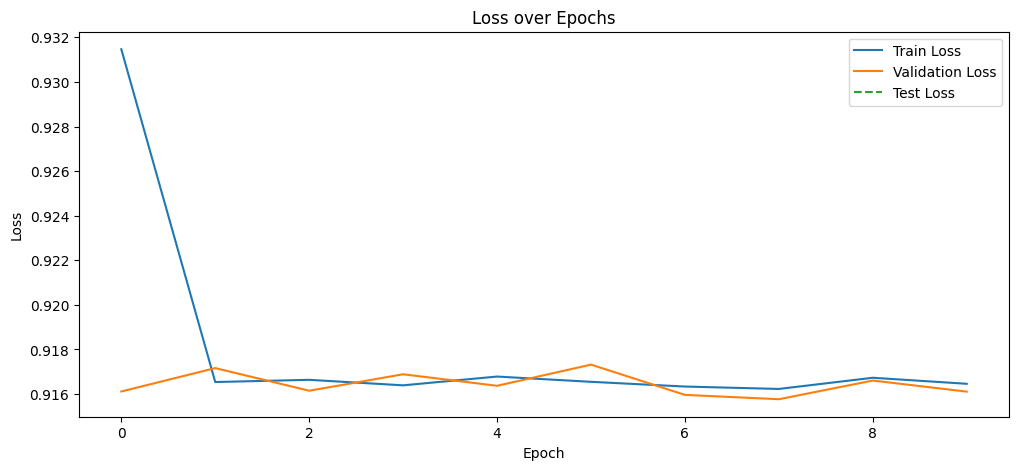

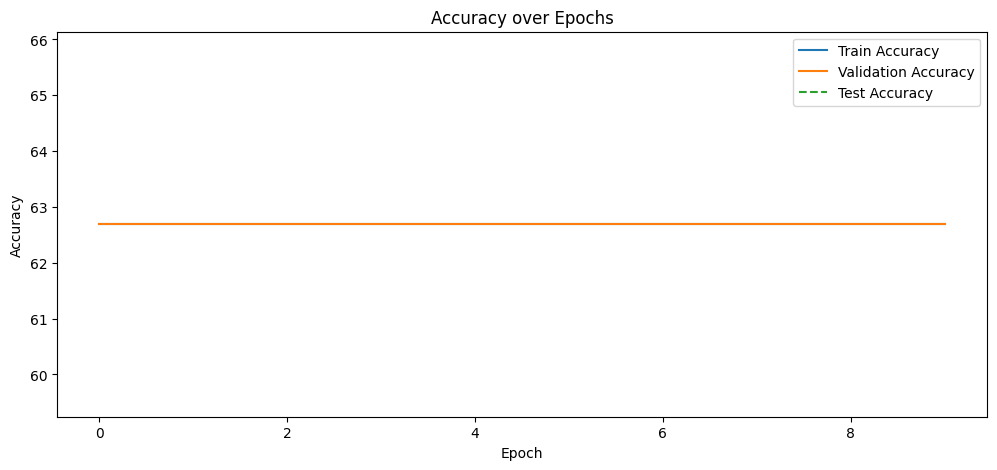

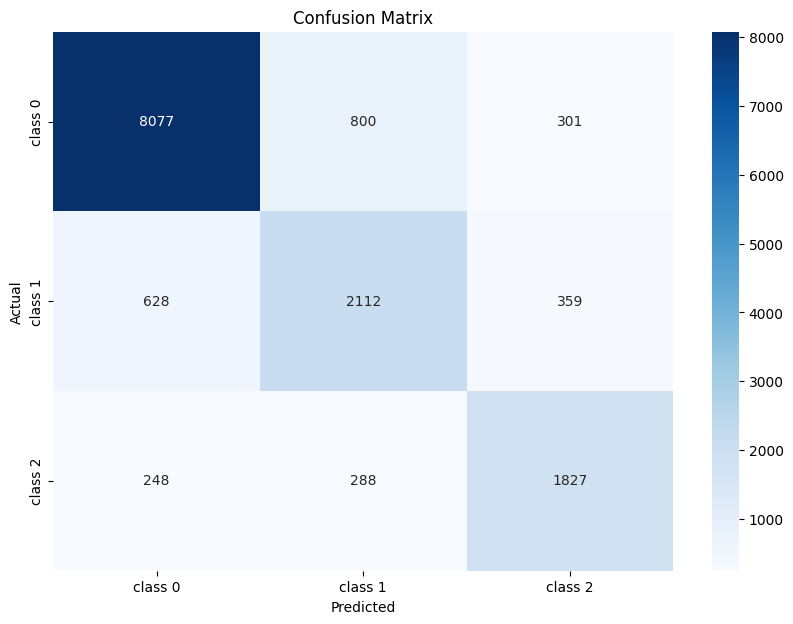

In [ ]:
# Plotting training, validation, and testing losses,
# Plotting training, validation, and testing accuracie
 # Visualize the confusion matrix
plotting()


In [ ]:
print(fourth_q_model_LSTM)

SimpleLSTM(
  (embedding): Embedding(17065, 128)
  (lstm): LSTM(128, 256, num_layers=3, batch_first=True, dropout=0.5, bidirectional=True)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=3, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
